**3/26/2020**

In this notebook, I'm going to do some numbers-comparisons of searches using the six types of database - Global, 16S_Pooled, 16S_Sample-matched, Shotgun_Pooled, Shotgun_Sample-Matched, and Hybrid_Sample-Matched

Because the Global database was so gigantic and expensive to run, I only ran it on a subset of 6 samples. So in these analyses, I'm only going to compare those 6 samples across all types of database searches.

In [1]:
from elliot_utils import *
initWithGlobal()

In [2]:
figPath = Path.cwd().joinpath('figures/comparing_database_types/')
analysisPath = Path.cwd().joinpath('analysis_files/3_databases_comparison/')

In [3]:
# Reports the number of sequences in the given database.
def countSeqsInDatabase(dbPath):
    count = 0
    with dbPath.open(mode='r') as infile:
        for line in infile:
            if line[0] == '>':
                count += 1
    return count

In [4]:
seqSizeDict = {}
seqSizeDict['Database'] = ['Global', '16S_Pooled', '16S_Sample-Matched', '16S_Sample-Matched', '16S_Sample-Matched', '16S_Sample-Matched', '16S_Sample-Matched', '16S_Sample-Matched', 'Shotgun_Pooled', 'Shotgun_Sample-Matched', 'Shotgun_Sample-Matched', 'Shotgun_Sample-Matched', 'Shotgun_Sample-Matched', 'Shotgun_Sample-Matched', 'Shotgun_Sample-Matched', 'Hybrid_Sample-Matched', 'Hybrid_Sample-Matched', 'Hybrid_Sample-Matched', 'Hybrid_Sample-Matched', 'Hybrid_Sample-Matched', 'Hybrid_Sample-Matched']
seqSizeDict['Sequences in Database'] = [131886982, 1345203, 174244, 401128, 231541, 96597, 187898, 32054, 443291, 45099, 111694, 42774, 27767, 68006, 21736, 194296, 474108, 248228, 101266, 224523, 32587]

In [5]:
for i in range(len(seqSizeDict['Sequences in Database'])):
    seqSizeDict['Sequences in Database'][i] = math.log(seqSizeDict['Sequences in Database'][i], 10)

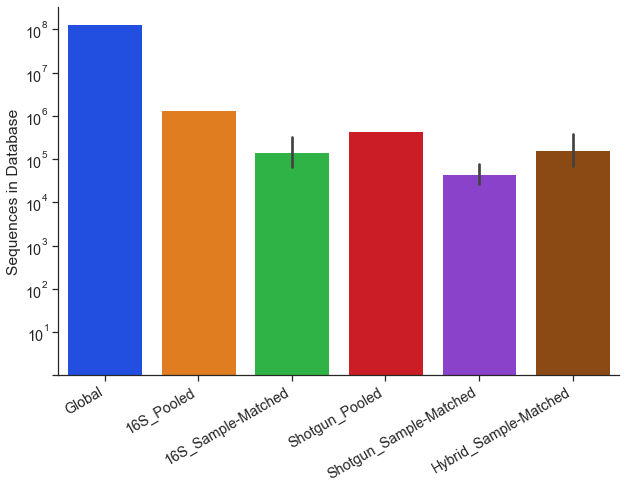

In [6]:
initialOnlyGraph = sns.catplot(x='Database', y='Sequences in Database', data=pd.DataFrame(seqSizeDict), height=6, aspect=1.5, kind='bar', ci='sd')
initialOnlyGraph.set_xlabels('')
initialOnlyGraph.set_xticklabels(rotation=30, ha='right')
initialOnlyGraph.set_yticklabels(['', r'$\mathregular{10^1}$', r'$\mathregular{10^2}$', r'$\mathregular{10^3}$', r'$\mathregular{10^4}$', r'$\mathregular{10^5}$', r'$\mathregular{10^6}$', r'$\mathregular{10^7}$', r'$\mathregular{10^8}$'])
initialOnlyGraph.savefig(figPath.joinpath('database_seqs_initonly.png'))

In [7]:
cpuHrsFile = analysisPath.joinpath('subset_cpu_hrs.csv')
cpuDF = pd.read_csv(cpuHrsFile)

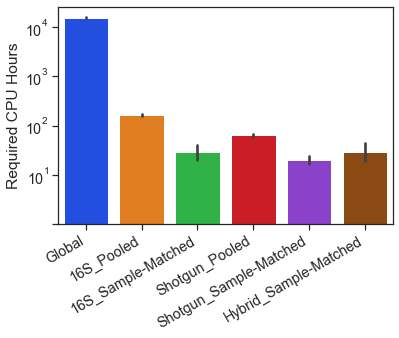

In [8]:
cpuHrsDict = {}
cpuHrsDict['Required CPU Hours'] = []
for x in cpuDF['cpuHrs']:
    cpuHrsDict['Required CPU Hours'].append(math.log(x, 10))
cpuHrsDict[''] = []
for x in cpuDF['db']:
    cpuHrsDict[''].append(x)
fig, ax = plt.subplots()
cpuGraph = sns.barplot(x='', y='Required CPU Hours', data=pd.DataFrame(cpuHrsDict), ci='sd')
ax.set_yticklabels(['', r'$\mathregular{10^1}$', r'$\mathregular{10^2}$', r'$\mathregular{10^3}$', r'$\mathregular{10^4}$'])
ax.set_xticklabels(labels=['Global', '16S_Pooled', '16S_Sample-Matched', 'Shotgun_Pooled', 'Shotgun_Sample-Matched', 'Hybrid_Sample-Matched'], rotation=30, ha='right')
saveFig(cpuGraph, figPath.joinpath('cpu.png'))

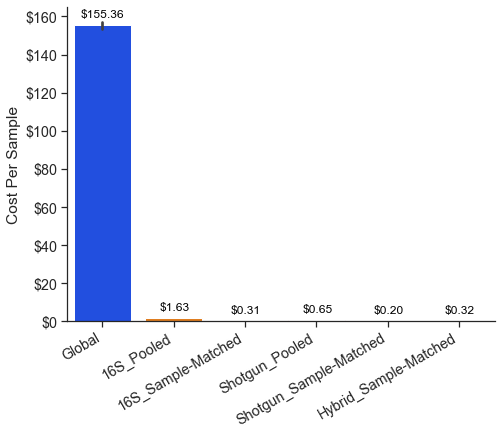

In [9]:
costDict = {}
costDict['Cost Per Sample'] = []
costDict[''] = cpuHrsDict['']
perHourCost = 0.1596
for cpuTime in cpuDF['cpuHrs']:
    realHrs = cpuTime / 16
    costDict['Cost Per Sample'].append(realHrs * perHourCost)
costGraph = sns.catplot(x='', y='Cost Per Sample', data=pd.DataFrame(costDict), ci='sd', aspect=1.5, kind='bar')
costGraph.set_yticklabels(['$0', '$20', '$40', '$60', '$80', '$100', '$120', '$140', '$160'])
costGraph.set_xticklabels(rotation=30, ha='right')
ax = costGraph.facet_axis(0,0)
offsets = [0.1, 0.2, 0.2, 0.2, 0.2, 0.2]
for i in range(len(ax.patches)):
    p = ax.patches[i]
    ax.text(p.get_x() + offsets[i], 
            p.get_height() + 4, 
           '${0:.2f}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')
costGraph.savefig(figPath.joinpath('cost.png'))

In [10]:
minusGlobalColors = sns.color_palette('bright', 10)[1:6]

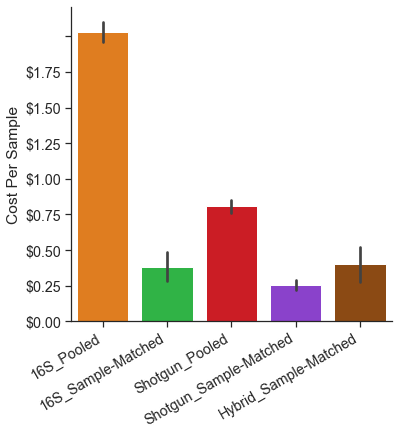

In [11]:
subsetCostDict = {}
subsetCostDict['Cost Per Sample'] = costDict['Cost Per Sample'][6:]
subsetCostDict[''] = costDict[''][6:]
subsetCostGraph = sns.catplot(x='', y='Cost Per Sample', data=pd.DataFrame(subsetCostDict), kind='bar', aspect=1.2, palette=minusGlobalColors)
subsetCostGraph.set_xticklabels(rotation=30, ha='right')
subsetCostGraph.set_yticklabels(['$0.00', '$0.25', '$0.50', '$0.75', '$1.00', '$1.25', '$1.50', '$1.75'])
subsetCostGraph.savefig(figPath.joinpath('cost_small_dbs.png'))

In [12]:
# Iterates through the cost dictionary and prints out the average cost for each database.
def printCostAverages(costDict):
    dataDict = {} # key=database name, value=list of costs
    for i in range(len(costDict[''])):
        dataDict[costDict[''][i]] = []
    for i in range(len(costDict['Cost Per Sample'])):
        db = costDict[''][i]
        dataDict[db].append(costDict['Cost Per Sample'][i])
    for db, costs in dataDict.items():
        print(db)
        print(sum(costs) / len(costs))

In [13]:
printCostAverages(costDict)

Global
155.36159756249998
16S_Pooled
1.6265899999999995
16S_Sample-Matched
0.30634388749999997
Shotgun_Pooled
0.647178
Shotgun_Sample-Matched
0.20345675
Hybrid_Sample-Matched
0.32097388749999994


In [14]:
globalResults = getOrderedFiles(GLOBAL_SUBSET_RESULTS, '.tsv')
communityResults = getOrderedFiles(COMMUNITY_SUBSET_RESULTS, '.tsv')
tailoredResults = getOrderedFiles(TAILORED_SUBSET_RESULTS, '.tsv')
combinedResults = getOrderedFiles(POOLED_SUBSET_RESULTS, '.tsv')
individualResults = getOrderedFiles(SINGLE_SUBSET_RESULTS, '.tsv')
hybridResults = getOrderedFiles(HYBRID_SUBSET_RESULTS, '.tsv')

In [15]:
# Parsing function to pull out the number of a specified type of spectra in a sample.
def countSpectra(resultsList, lookFor, allowedPeps):
    counts = []
    for res in resultsList:
        with res.open(mode='r') as infile:
            reader = csv.reader(infile, delimiter='\t')
            count = 0
            for row in reader:
                if row[PROTEIN_HITS] == 'Protein':
                    continue
                if not isSignificant(row):
                    break
                protType = determineIDType(row)
                if row[PEPTIDE] in allowedPeps and protType == lookFor:
                    count += 1
        counts.append(count)
    return counts

In [16]:
subsetSampleNames = ['1304', '1322', '1324', '1334', '1336', '1340']
dbLabels = []
dbLabels += ['Global' for x in range(6)]
dbLabels += ['16S_Pooled' for x in range(6)]
dbLabels += ['16S_Sample-Matched' for x in range(6)]
dbLabels += ['Shotgun_Pooled' for x in range(6)]
dbLabels += ['Shotgun_Sample-Matched' for x in range(6)]
dbLabels += ['Hybrid_Sample-Matched' for x in range(6)]

In [17]:
gAllowedHumanPeps = getFilteredPeptides(globalResults, 'human')
cAllowedHumanPeps = getFilteredPeptides(communityResults, 'human')
tAllowedHumanPeps = getFilteredPeptides(tailoredResults, 'human')
combAllowedHumanPeps = getFilteredPeptides(combinedResults, 'human')
iAllowedHumanPeps = getFilteredPeptides(individualResults, 'human')
hAllowedHumanPeps = getFilteredPeptides(hybridResults, 'human')
gAllowedNonhumanPeps = getFilteredPeptides(globalResults, 'bacteria')
cAllowedNonhumanPeps = getFilteredPeptides(communityResults, 'bacteria')
tAllowedNonhumanPeps = getFilteredPeptides(tailoredResults, 'bacteria')
combAllowedNonhumanPeps = getFilteredPeptides(combinedResults, 'bacteria')
iAllowedNonhumanPeps = getFilteredPeptides(individualResults, 'bacteria')
hAllowedNonhumanPeps = getFilteredPeptides(hybridResults, 'bacteria')

In [18]:
gFilteredHumanCount = countSpectra(globalResults, 'human', gAllowedHumanPeps)
cFilteredHumanCount = countSpectra(communityResults, 'human', cAllowedHumanPeps)
tFilteredHumanCount = countSpectra(tailoredResults, 'human', tAllowedHumanPeps)
combFilteredHumanCount = countSpectra(combinedResults, 'human', combAllowedHumanPeps)
iFilteredHumanCount = countSpectra(individualResults, 'human', iAllowedHumanPeps)
hFilteredHumanCount = countSpectra(hybridResults, 'human', hAllowedHumanPeps)

In [19]:
gFilteredNonhumanCount = countSpectra(globalResults, 'bacteria', gAllowedNonhumanPeps)
cFilteredNonhumanCount = countSpectra(communityResults, 'bacteria', cAllowedNonhumanPeps)
tFilteredNonhumanCount = countSpectra(tailoredResults, 'bacteria', tAllowedNonhumanPeps)
combFilteredNonhumanCount = countSpectra(combinedResults, 'bacteria', combAllowedNonhumanPeps)
iFilteredNonhumanCount = countSpectra(individualResults, 'bacteria', iAllowedNonhumanPeps)
hFilteredNonhumanCount = countSpectra(hybridResults, 'bacteria', hAllowedNonhumanPeps)

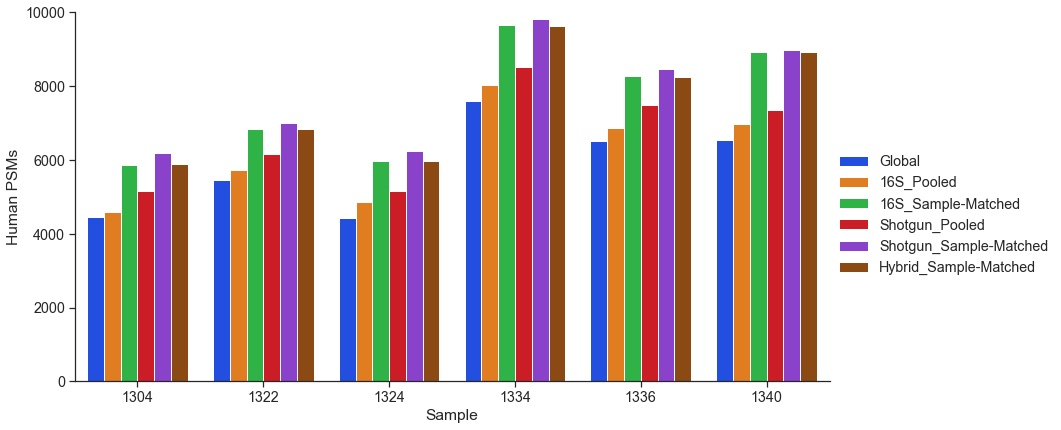

In [20]:
humanFilteredCountsDF = pd.DataFrame({'Spectral Count':gFilteredHumanCount + cFilteredHumanCount + tFilteredHumanCount + combFilteredHumanCount + iFilteredHumanCount + hFilteredHumanCount, 'Sample':subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames, '':dbLabels})
humanFilteredSpectraGraph = sns.catplot(x='Sample', y='Spectral Count', hue='', data=humanFilteredCountsDF, height=6, aspect=2, kind="bar")
humanFilteredSpectraGraph.set_ylabels('Human PSMs')
humanFilteredSpectraGraph.set(ylim=(0, 10000))
humanFilteredSpectraGraph.savefig(figPath.joinpath('filtered_human_psms_hybrid.png'))

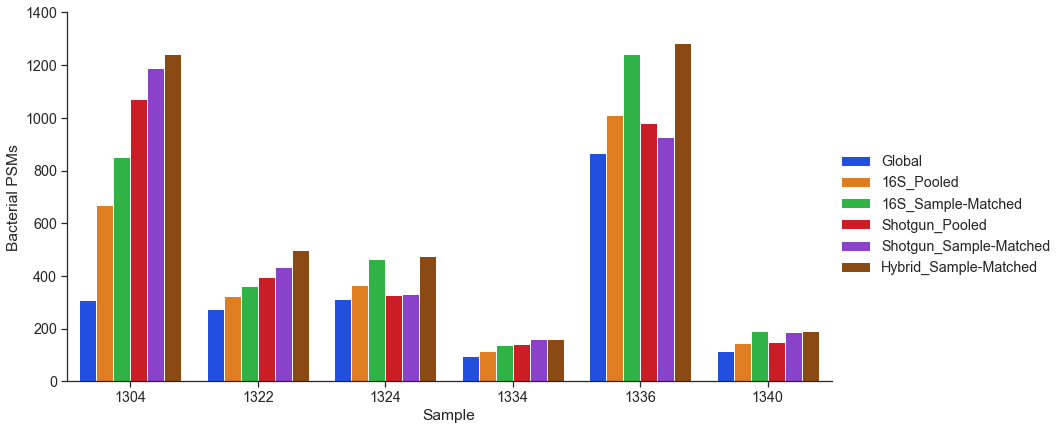

In [21]:
nonhumanFilteredCountsDF = pd.DataFrame({'Spectral Count':gFilteredNonhumanCount + cFilteredNonhumanCount + tFilteredNonhumanCount + combFilteredNonhumanCount + iFilteredNonhumanCount + hFilteredNonhumanCount, 'Sample':subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames + subsetSampleNames, '':dbLabels})
nonhumanFilteredSpectraGraph = sns.catplot(x='Sample', y='Spectral Count', hue='', data=nonhumanFilteredCountsDF, height=6, aspect=2, kind="bar")
nonhumanFilteredSpectraGraph.set_ylabels('Bacterial PSMs')
nonhumanFilteredSpectraGraph.set(ylim=(0, 1400))
nonhumanFilteredSpectraGraph.savefig(figPath.joinpath('filtered_bacterial_psms_hybrid.png'))

In [22]:
globalRef = ProtRef(GLOBAL_SUBSET_DB.joinpath('Global_refined.fasta'))
communityRef = ProtRef(COMMUNITY_SUBSET_DB.joinpath('Community5_Subset_Refined_1.fasta'))

In [23]:
# key=sample id, value=set of genera present in that sample according to sequencing
taxaInSample = {}
with analysisPath.joinpath('taxa_by_sample_01.csv').open(mode='r') as infile:
    csvreader = csv.reader(infile)
    i = 0
    for row in csvreader:
        skipRow = True
        for sampleName in subsetSampleNames:
            if row[0].find(sampleName) != -1:
                skipRow = False
                break
        if skipRow:
            continue
        taxaInSample[subsetSampleNames[i]] = set()
        for j in range(1, len(row)):
            if row[j] == '':
                continue
            taxaInSample[subsetSampleNames[i]].add(getFirstWord(row[j]))
        i += 1

In [24]:
# Returns an array where each number is the percent of hits in a sample that matched no bacteria present by sequencing
# Counts a hit as false if none of the genera of organisms that match the peptide are in the sample
def getPercentsFalse(results, protRef, allowedPeps):
    percentsFalse = []
    _iter = 0
    for res in results:
        total = 0
        false = 0
        with res.open(mode='r') as tsvin:
            tsvReader = csv.reader(tsvin, delimiter='\t')
            for row in tsvReader:
                if row[PROTEIN_HITS] == 'Protein':
                    continue
                if not isSignificant(row):
                    break
                protType = determineIDType(row)
                if protType == 'bacteria' and row[PEPTIDE] in allowedPeps:
                    total += 1
                    hitProteins = getProteinHitList(row, 'bacteria')
                    hitTaxa = set()
                    for hit in hitProteins:
                        for t in protRef.getProt(hit).taxa:
                            hitTaxa.add(t)
                    validTaxa = False
                    for taxa in hitTaxa:
                        if getFirstWord(taxa) in taxaInSample[subsetSampleNames[_iter]] or (getFirstWord(taxa) == 'Atopobium' and 'Fannyhessea' in taxaInSample[subsetSampleNames[_iter]]):
                            validTaxa = True
                            break
                    if not validTaxa:
                        false += 1
        percentsFalse.append((false / total) * 100)
        _iter += 1
    return percentsFalse

In [25]:
globalPercentFalse = getPercentsFalse(globalResults, globalRef, gAllowedNonhumanPeps)
communityPercentFalse = getPercentsFalse(communityResults, communityRef, cAllowedNonhumanPeps)

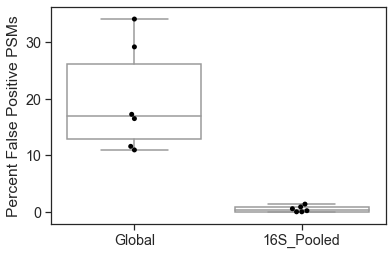

In [26]:
falsePlotLabels = ['Global' for x in range(6)]
falsePlotLabels.extend(['16S_Pooled' for x in range(6)])
falseDataFrame = pd.DataFrame({'Percent False Positive PSMs':globalPercentFalse + communityPercentFalse, '':falsePlotLabels})
sns.boxplot(x='', y='Percent False Positive PSMs', data=falseDataFrame, color='white')
falseGraph = sns.swarmplot(x='', y='Percent False Positive PSMs', data=falseDataFrame, color='black')
saveFig(falseGraph, figPath.joinpath('global_community_falsehits.png'))

Get the most commonly falsely identified taxa labels for the Global and 16S_Pooled databases.

In [27]:
# If the taxon includes WP=XXXXX (i.e. 'Genus species WP=XXXXXX'), returns 'Genus species'
def consolidateTaxonLabel(taxon):
    endIndex = taxon.find('WP=')
    if endIndex == -1:
        return taxon
    return taxon[:endIndex - 1]

# Returns a dictionary where the key is the taxa ID and the value is the number of spectra false positively ascribed to that taxa across all samples
# Counts a hit as false if none of the genera of organisms that match the peptide are in the sample
# Equates "Atopobium" in the database to "Fannyhessea" in the samples
# If there are multiple unique taxa that only differ by 'WP=XXXXXX', consolidates those taxonomic labels
def getTaxaFalseHits(results, protRef, allowedPeps):
    toReturn = {} # key=taxa ID, value=false positive spectrum count
    _iter = 0
    for res in results:
        with res.open(mode='r') as tsvin:
            tsvReader = csv.reader(tsvin, delimiter='\t')
            for row in tsvReader:
                if row[PROTEIN_HITS] == 'Protein':
                    continue
                if not isSignificant(row):
                    break
                protType = determineIDType(row)
                if protType == 'bacteria' and row[PEPTIDE] in allowedPeps:
                    hitProteins = getProteinHitList(row, 'bacteria')
                    hitTaxa = set()
                    for hit in hitProteins:
                        for t in protRef.getProt(hit).taxa:
                            hitTaxa.add(consolidateTaxonLabel(t))
                    validTaxa = False
                    for taxa in hitTaxa:
                        if getFirstWord(taxa) in taxaInSample[subsetSampleNames[_iter]] or (getFirstWord(taxa) == 'Atopobium' and 'Fannyhessea' in taxaInSample[subsetSampleNames[_iter]]):
                            validTaxa = True
                            break
                    if not validTaxa:
                        for taxa in hitTaxa:
                            if not taxa in toReturn.keys():
                                toReturn[taxa] = 0
                            toReturn[taxa] += 1
        _iter += 1
    return toReturn

In [28]:
gFalseTaxa = getTaxaFalseHits(globalResults, globalRef, gAllowedNonhumanPeps)
cFalseTaxa = getTaxaFalseHits(communityResults, communityRef, cAllowedNonhumanPeps)

In [29]:
falseGlobalFile = analysisPath.joinpath('false_taxa_global.csv')
falseCommunityFile = analysisPath.joinpath('false_taxa_community.csv')

In [30]:
# Write the false positively hit taxa and their spectral counts to file
with falseGlobalFile.open(mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Taxa ID', 'False Count'])
    for taxa, count in gFalseTaxa.items():
        writer.writerow([taxa, str(count)])

with falseCommunityFile.open(mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Taxa ID', 'False Count'])
    for taxa, count in cFalseTaxa.items():
        writer.writerow([taxa, str(count)])

How many significant fungal PSMs do the Global and 16S_Pooled DBs identify in these samples?

In [31]:
gFungalPeptides = getFilteredPeptides(globalResults, 'fungi')
cFungalPeptides = getFilteredPeptides(communityResults, 'fungi')

In [32]:
gFungalSpectra = countSpectra(globalResults, 'fungi', gFungalPeptides)
cFungalSpectra = countSpectra(communityResults, 'fungi', cFungalPeptides)

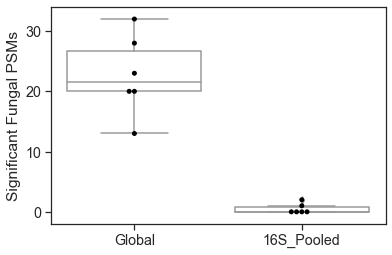

In [33]:
fungiPlotLabels = ['Global' for x in range(6)]
fungiPlotLabels.extend(['16S_Pooled' for x in range(6)])
fungiDataFrame = pd.DataFrame({'Significant Fungal PSMs':gFungalSpectra + cFungalSpectra, '':fungiPlotLabels})
sns.boxplot(x='', y='Significant Fungal PSMs', data=fungiDataFrame, color='white')
fungiGraph = sns.swarmplot(x='', y='Significant Fungal PSMs', data=fungiDataFrame, color='black')
saveFig(fungiGraph, figPath.joinpath('global_community_fungi_PSMs.png'))